## ДИСКРЕТНАЯ МАТЕМАТИКА  <br/>
# Семинар 1 <br/>
**Голев Александр 135М**


In [98]:
# Импортируем необходимые библиотеки
import itertools

import sympy
import matplotlib.pyplot as plt

from fractions import Fraction
from math import factorial

from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.collections import PatchCollection

import numpy as np

---
## Задача №18
Написать программу, которая генерирует все трехбуквенные слова русского алфавита,<br/>
не начинающиеся на буквы **'ь', 'ъ', 'ы'**.<br/>
Подсчитать итоговое количество слов.

In [6]:
# Определяем все буквы русского алфавита
russian_alphabet = 'абвгдеёжзийклмнопрстуфхцчшщэюяьъы'

# Исключаем буквы "ь", "ъ", "ы" из начального положения
start_letters = russian_alphabet[:-3]

# Генерируем все трехбуквенные слова, которые начинаются на допустимые буквы
three_letter_words = [
    ''.join(word) for word in itertools.product(start_letters, russian_alphabet, russian_alphabet)
]

print(f'Количество трехбуквенных слов: {len(three_letter_words)}')
print('Примеры трехбуквенных слов:', three_letter_words[:10])

Количество трехбуквенных слов: 32670
Примеры трехбуквенных слов: ['ааа', 'ааб', 'аав', 'ааг', 'аад', 'аае', 'ааё', 'ааж', 'ааз', 'ааи']


---
## Задача №19
Исследовать вопрос о зависимости относительного расстояния между парой ближайших простых чисел<br/>
от номера простого числа, исходя из начального отрезка натурального ряда **1,2, … , 𝑁**.

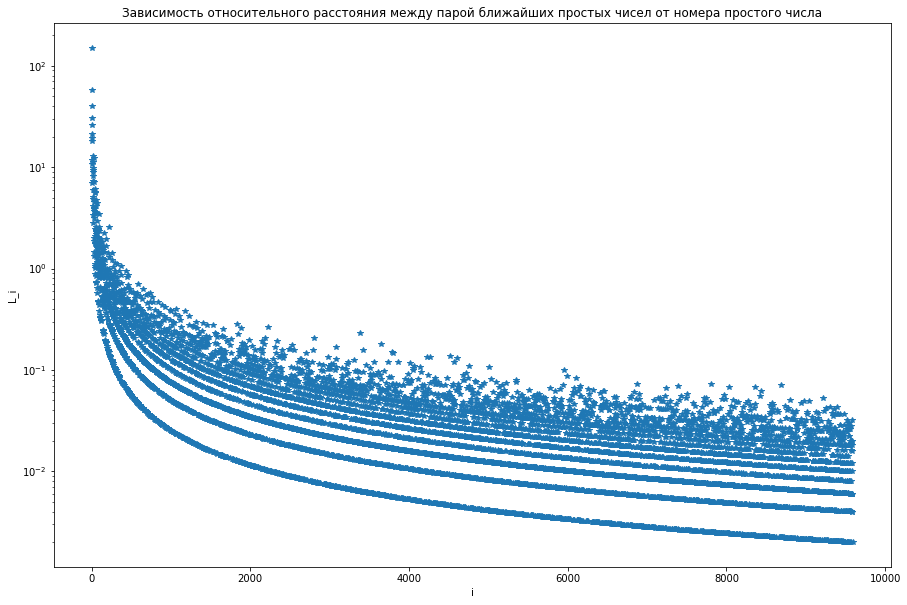

In [14]:
# Определяем длину анализируемой последовательности натуральных чисел
# Вводим массив относительных длин расстояний между парой ближайших простых чисел
N, L = 10**5, []

# Определяем первую пару ближайших простых чисел и относительное расстояние между ними в процентах
p = sympy.nextprime(1)
p_next = sympy.nextprime(p + 1)
L.append(100 * (p_next - p) / p)

# Запускаем цикл перебора всех последующих пар ближайших простых чисел
while p_next < N:
    p = p_next
    p_next = sympy.nextprime(p + 1)
    if p_next < N:
        L.append(100 * (p_next - p) / p)

# Рисуем график зависимости относительного расстояния между парой простых чисел в зависимости от номера в логарифмическом масштабе по оси ординат
plt.figure(figsize=(15,10))
plt.semilogy(range(1, len(L) + 1), L, '*')
plt.xlabel('i')
plt.ylabel('L_i')
plt.title('Зависимость относительного расстояния между парой ближайших простых чисел от номера простого числа')
plt.show()

---
## Задача №20
Пусть бесконечное дискретное множество 𝑋 порождаются итеративно</br> 
согласно процедуре **𝑥<sub>𝑛+1</sub> = 𝑔(𝑥<sub>𝑛</sub>), 𝑛 = ℕ,** найти **𝑥<sub>5</sub>** в следующих двух случаях:

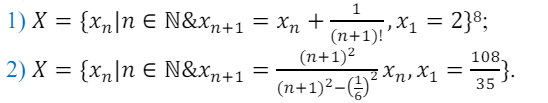

In [24]:
# Первая последовательность
def first_sequence(x0, n):
    x = x0
    for i in range(1, n):
        x += Fraction(1, factorial(i+ 1))
    return x

# Вторая последовательность
def second_sequence(x0, n):
    x = x0
    for i in range(1, n):
        x *= Fraction((i + 1)**2, (i + 1)**2 - Fraction(1, 6)**2)
    return x

# Начальные условия
x1_1,x1_2  = Fraction(2, 1), Fraction(108, 35)

# Вычисляем x5 для первой и второй последовательности
x5_1 = first_sequence(x1_1, 5)
x5_2 = second_sequence(x1_2, 5)

print(f'Ответ 1: {x5_1} = {float(x5_1)}\n')
print(f'Ответ 2: {x5_2} = {float(x5_2)}')

Ответ 1: 163/60 = 2.716666666666667

Ответ 2: 104485552128/33426748355 = 3.1258066449760125


---
## Задача №21
Даны два множества **𝐴 = {4,7,5,9,8}** и **𝐵 = {2,9,10,6,5}**.</br>
Написать программу, листинг №20, которая найдет объединение, пересечение,</br>
разность и симметричную разность пары множеств *𝐴* и *𝐵*.


In [33]:
def set_show(f):
    a = list(f)
    a.sort()
    return a

A,B = set([4,7,5,9,8]), set([2,9,10,6,5])

#Понятно, что мы учимся, но зачем изобретать велосипед
print(f'Объединение 𝐴 ∪ B: {set_show(A.union(B))}\n')
print(f'Пересечение 𝐴 ∩ B: {set_show(A.intersection(B))}\n')
print(f'Разность 𝐴 \ B: {set_show(A.difference(B))}\n')
print(f'Симметричная разность 𝐴 Δ B: {set_show(A.symmetric_difference(B))}\n')

Объединение 𝐴 ∪ B: [2, 4, 5, 6, 7, 8, 9, 10]

Пересечение 𝐴 ∩ B: [5, 9]

Разность 𝐴 \ B: [4, 7, 8]

Симметричная разность 𝐴 Δ B: [2, 4, 6, 7, 8, 10]



---
## Задача №22
Пусть на плоскости заданы два многоугольника **𝐴 и 𝐵** с вершинами в точках **{(0,0), (1,0), (0,1)} и {(0,0), (1,1), (2,0), (1, −1)}** соответственно.</br> 
Построить области пересечения, объединения, разности и симметричной разности пары многоугольников.

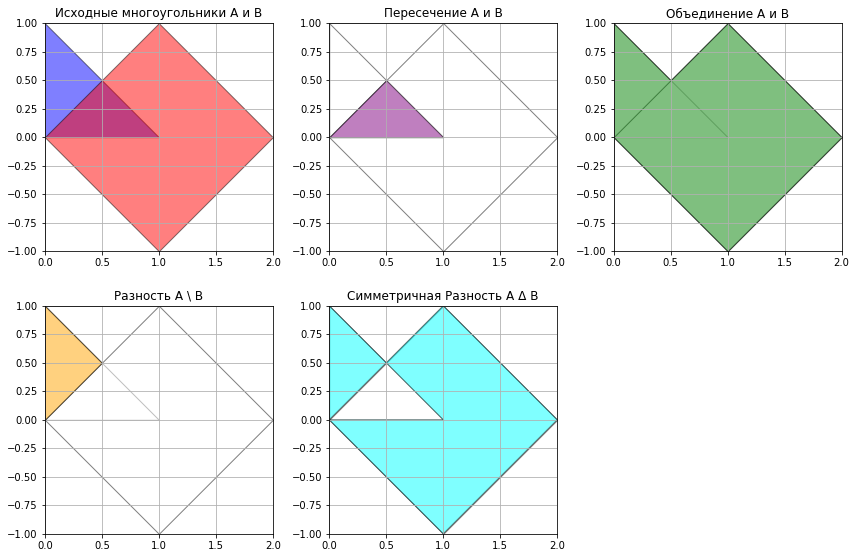

In [64]:
# Создание объектов многоугольников
vertices_A, vertices_B = [(0, 0), (1, 0), (0, 1)], [(0, 0), (1, 1), (2, 0), (1, -1)]
polygon_A, polygon_B = Polygon(vertices_A), Polygon(vertices_B)

# Вычисление областей
intersection = polygon_A.intersection(polygon_B)
union = polygon_A.union(polygon_B)
difference = polygon_A.difference(polygon_B)
symmetric_difference = polygon_A.symmetric_difference(polygon_B)

# Функция для добавления многоугольника к графику
def build_polygons(ax, poly, title, color):
    ax.set_title(title)
    add_polygon(ax, polygon_A, 'white')
    add_polygon(ax, polygon_B, 'white')
    add_polygon(ax, poly, color)

def add_polygon(ax, polygon, color):
    if not polygon.is_empty:
        if polygon.geom_type == 'Polygon':
            patches = [MplPolygon(list(polygon.exterior.coords), closed=True)]
        elif polygon.geom_type == 'MultiPolygon':
            patches = [MplPolygon(list(poly.exterior.coords), closed=True) for poly in polygon.geoms]
        else:
            return
        collection = PatchCollection(patches, facecolor=color, edgecolor='black', alpha=0.5)
        ax.add_collection(collection)


# Построение графиков
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

# Исходные многоугольники
axs[0].set_title('Исходные многоугольники A и B')
add_polygon(axs[0], polygon_A, 'blue')
add_polygon(axs[0], polygon_B, 'red')

# Пересечение
build_polygons(axs[1], intersection, 'Пересечение A и B', 'purple')
# Объединение
build_polygons(axs[2], union, 'Объединение A и B', 'green')
# Разность A \ B
build_polygons(axs[3], difference, 'Разность A \\ B', 'orange')
# Симметричная разность
build_polygons(axs[4], symmetric_difference, 'Cимметричная Разность A Δ B', 'cyan')

# Настройки отображения
for ax in axs:
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', 'box')
    ax.grid(True)

fig.delaxes(axs[5])
plt.tight_layout()
plt.show()

---
## Задача №23
Найти **мощность множества** числовых комбинаций в игре **7 из 49**, услуги которой предоставляет игровой супермаркет “Столото”.

In [66]:
def combinations(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

# Количество чисел в игре и количество чисел в комбинации
total_numbers = 49
numbers_in_combination = 7

# Вычисление количества комбинаций
total_combinations = combinations(total_numbers, numbers_in_combination)
print("Количество комбинаций в игре 7 из 49:", total_combinations)

Количество комбинаций в игре 7 из 49: 85900584


---
## Задача №24
Написать программу генерации **цепочек** символов, состоящих **из нулей и единиц**, длиной 10.

In [68]:
# Довольно элегантное решение для этой задачи - использование рекурсивной функции
def generate_binary_strings(length, prefix=""):
    if length == 0:
        print(prefix)
    else:
        generate_binary_strings(length - 1, prefix + "0")
        generate_binary_strings(length - 1, prefix + "1")

# Генерация всех возможных цепочек символов длиной 10
generate_binary_strings(10)

0000000000
0000000001
0000000010
0000000011
0000000100
0000000101
0000000110
0000000111
0000001000
0000001001
0000001010
0000001011
0000001100
0000001101
0000001110
0000001111
0000010000
0000010001
0000010010
0000010011
0000010100
0000010101
0000010110
0000010111
0000011000
0000011001
0000011010
0000011011
0000011100
0000011101
0000011110
0000011111
0000100000
0000100001
0000100010
0000100011
0000100100
0000100101
0000100110
0000100111
0000101000
0000101001
0000101010
0000101011
0000101100
0000101101
0000101110
0000101111
0000110000
0000110001
0000110010
0000110011
0000110100
0000110101
0000110110
0000110111
0000111000
0000111001
0000111010
0000111011
0000111100
0000111101
0000111110
0000111111
0001000000
0001000001
0001000010
0001000011
0001000100
0001000101
0001000110
0001000111
0001001000
0001001001
0001001010
0001001011
0001001100
0001001101
0001001110
0001001111
0001010000
0001010001
0001010010
0001010011
0001010100
0001010101
0001010110
0001010111
0001011000
0001011001
0001011010

---
## Задача №25

Построить все элементы множества, 𝐷, образованного путем **декартового произведения** трех множеств, </br>
состоящих из некоторых имен, 𝐴 отчеств, 𝐵 и фамилий, 𝐶.</br> 
Считать, что</br>
**𝐴 = {Александр, Николай, Светлана}**;</br>
**В = {Иван,Денис, Петр, Эдуард}**;</br>
**𝐶 = {Иванов, Петров, Сидоров, Фролов}**.</br>

In [84]:
A = ["Александр", "Николай", "Светлана"]
B = ["Иван", "Денис", "Петр", "Эдуард"]
C = ["Иванов", "Петров", "Сидоров", "Фролов"]

# Создание множества D с использованием декартова произведения
D = itertools.product(A, B, C)

# Вывод множества D
for l, element in enumerate(D):
    print(f"l={l} D="," ".join(element))

l=0 D= Александр Иван Иванов
l=1 D= Александр Иван Петров
l=2 D= Александр Иван Сидоров
l=3 D= Александр Иван Фролов
l=4 D= Александр Денис Иванов
l=5 D= Александр Денис Петров
l=6 D= Александр Денис Сидоров
l=7 D= Александр Денис Фролов
l=8 D= Александр Петр Иванов
l=9 D= Александр Петр Петров
l=10 D= Александр Петр Сидоров
l=11 D= Александр Петр Фролов
l=12 D= Александр Эдуард Иванов
l=13 D= Александр Эдуард Петров
l=14 D= Александр Эдуард Сидоров
l=15 D= Александр Эдуард Фролов
l=16 D= Николай Иван Иванов
l=17 D= Николай Иван Петров
l=18 D= Николай Иван Сидоров
l=19 D= Николай Иван Фролов
l=20 D= Николай Денис Иванов
l=21 D= Николай Денис Петров
l=22 D= Николай Денис Сидоров
l=23 D= Николай Денис Фролов
l=24 D= Николай Петр Иванов
l=25 D= Николай Петр Петров
l=26 D= Николай Петр Сидоров
l=27 D= Николай Петр Фролов
l=28 D= Николай Эдуард Иванов
l=29 D= Николай Эдуард Петров
l=30 D= Николай Эдуард Сидоров
l=31 D= Николай Эдуард Фролов
l=32 D= Светлана Иван Иванов
l=33 D= Светлана Иван

---
## Задача №26
Пусть **𝐴 = {1,2,3}**, **𝐵 = {1,2}**, а бинарное отношение 𝑅 пары </br>
множеств 𝐴 и 𝐵 определяется условием **𝑅 = {(1,2), (2,1), (3,1)} ⊂ 𝐴 × 𝐵**. </br>
Найти обратное отношение, дополнение отношения, тождественное и универсальные отношения.</br>

In [96]:
def sort_set(a):
    return sorted(list(a), key=lambda x: 2*x[0] + x[1])


# Исходное отношение
A,B = {1, 2, 3}, {1, 2}
R = {(1, 2), (2, 1), (3, 1)}

# Обратное отношение (R^(-1))
R_inv = set()

for val in R:
    a,b = val
    if ((b,a) in R and val not in R_inv): R_inv.add((b, a)) 

# Дополнение отношения (~R) относительно универсального отношения (A × B)

universal_relation = {(a, b) for a in A for b in B}
complement_R = universal_relation - R

# Тождественное отношение (I_A)
identity_relation_A = {(a, a) for a in A}

# Универсальное отношение (A × B)
universal_relation_A_B = {(a, b) for a in A for b in B}

# Вывод результатов
print("Обратное отношение (R^(-1)):", sort_set(R_inv), end = '\n\n')
print("Дополнение отношения (~R):", sort_set(complement_R), end = '\n\n')
print("Тождественное отношение (I_A):", sort_set(identity_relation_A), end = '\n\n')
print("Универсальное отношение (𝑈 = A × B):", sort_set(universal_relation_A_B), end = '\n\n')

Обратное отношение (R^(-1)): [(2, 1)]

Дополнение отношения (~R): [(1, 1), (2, 2), (3, 2)]

Тождественное отношение (I_A): [(1, 1), (2, 2), (3, 3)]

Универсальное отношение (𝑈 = A × B): [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2)]



---
## Задача №27
Дана функция 𝑦 = 𝑓(𝑥) = √(1 − 𝑥<sup>2</sup>): [−1,1] → [0,1].</br> К какому классу функций (инъекция, сюръекция, биекция) она относится.


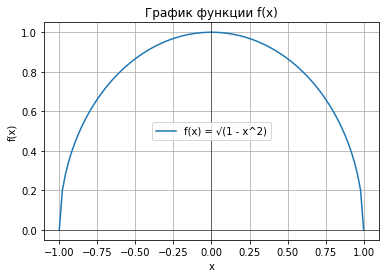

In [101]:
# Определим функцию f(x)
def f(x):
    return np.sqrt(1 - x**2)

# Зададим интервал [-1, 1]
x = np.linspace(-1, 1, 100)
y = f(x)

# Построим график функции
plt.plot(x, y, label='f(x) = √(1 - x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

Функция 𝑓 **не является инъекцией**, т.к. ∀𝑦, 𝑦 ∈ [0,1] существует два значения аргумента ±𝑥, такие что 𝑦 = 𝑓(±𝑥). 

Функция 𝑓 **является сюръективной**, т.к. ∀𝑦, 𝑦 ∈ [0,1] существует 𝑥, 𝑥 ∈ [−1,1] такое, что 𝑦 = 𝑓(𝑥).

Поскольку функция 𝑓 сюръективная, но не инъективная, постольку она **не является биекцией**.

---
## Задача №28
Отнести каждую из четырех функций: 
1) y = x<sup>2</sup> : ℝ → [0, +∞); 
2) y = e<sup>x</sup> : ℝ → (0, +∞); 
3) y = x|x| : ℝ → ℝ; 
4) y = |x| : [0, +∞) → ℝ 

к одному из трех классов (инъекция, сюръекция, биекция).

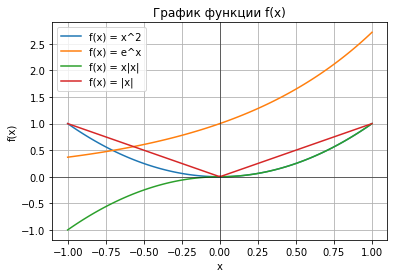

In [103]:
# Определим функцию f(x)
def f1(x):
    return x**2

def f2(x):
    return np.exp(x) 

def f3(x):
    return x * np.abs(x)

def f4(x):
    return np.abs(x)

# Зададим интервал [-1, 1]
x = np.linspace(-1, 1, 100)


# Построим график функции
plt.plot(x, f1(x), label='f(x) = x^2')
plt.plot(x, f2(x), label='f(x) = e^x')
plt.plot(x, f3(x), label='f(x) = x|x|')
plt.plot(x, f4(x), label='f(x) = |x|')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

1) y = x<sup>2</sup> **сюръекция, не инъекция**, так как ∀𝑦, 𝑦 ∈ [0, +∞) существует два значения аргумента ±𝑥, такие что 𝑦 = 𝑓(±𝑥). 
2) y = у<sup>x</sup> - **биекция** (инъективная и сюръективная); 
3) y = x|x| - **биекция** (инъективная и сюръективная); 
4) y = |x| - **инъекция, не сюръекция**, так как не для ∀𝑦, 𝑦 ∈ ℝ существует два значения аргумента ±𝑥, такие что 𝑦 = 𝑓(±𝑥). 